<a href="https://colab.research.google.com/github/xesmaze/cpsc541-fall2024/blob/main/lectures/ImputationWorkflow_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Step 1 . Data Exploration**

First, load the dataset and examine the missing data patterns, and the correlation structure.
We will use automobile data set for this exercise
You can download the data from https://www.kaggle.com/datasets/toramky/automobile-dataset?resource=download

and upload to your colab instance.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import os
from scipy import stats
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures




# Load your dataset (replace with actual data source)
df = pd.read_csv('Automobile_data.csv')
df.head()

# df = pd.read_csv('your_dataset.csv')

# Check for missing data
#print(df.isnull().sum())

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [2]:
! pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 52.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6d228832993c4a785b33117a2cfacf92c24e73dd5ce11ca90f9664b31afe3bf7
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [4]:
df.shape

(205, 26)

In [5]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
df.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Missing data in this dataset is represented by the symbol ```?```, you will need to first replace this symbol with NaN values (which are recognized as missing values by pandas and most imputation techniques).



In [8]:
# Replace '?' with NaN
df.replace("?",np.nan,inplace =True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [9]:
# sum of null values in every columns.
df.isnull().sum()

,0
symboling,0
normalized-losses,41
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [10]:
# no of duplicated rows in data frames
df.duplicated().value_counts()

,count
False,205


**Step 2. Explore missing data**
- Heatmap is the most suitable visualization for this.

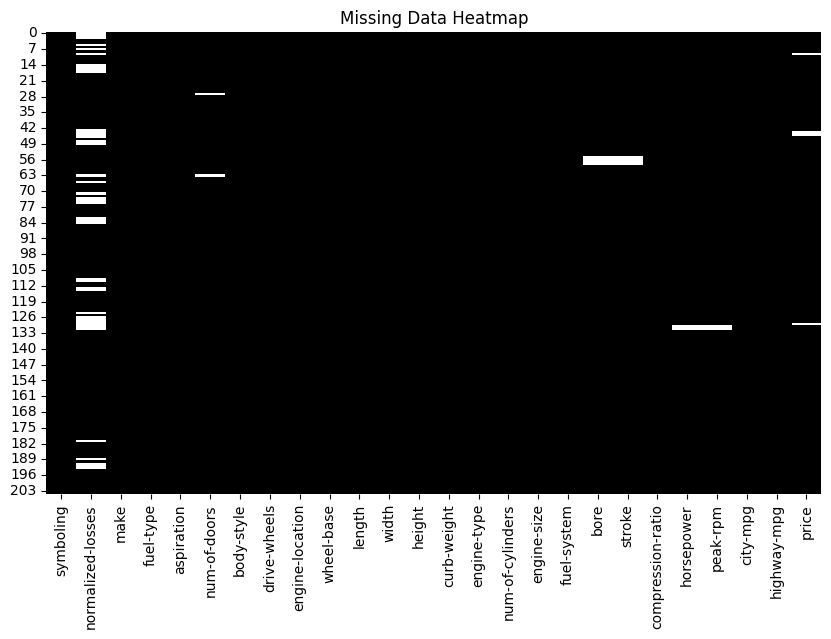

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='cubehelix')
plt.title("Missing Data Heatmap")
plt.show()


```"num-of-doors","normalized-losses","bore","stroke","horsepower","peak-rpm","price"``` columns have missing values.

We start by replacing the **missing values by mean value for all variable except "num-of-doors"**. This variable missing values will be replace by **most frequency** value.

In [12]:
#Count the unique values in num-of-doors
Counter(df["num-of-doors"])

Counter({'two': 89, 'four': 114, nan: 2})

We will try various different imputations from scikit-learn.impute, as well as two model based imputations, using Bayesian Ridge Regression and RandomForest Regression, both also implemented in scikit-learn, for a total of 5 imputation methods and compare their results...

Start by creating a copy of the original data frame, with all the missing values.

In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer
## There are other imputers similar to IterativeImputer- read more at
## https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor

## Validation functionality incorporated 10/02/2024
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Create a copy of the df

df1 = df

# Create an array of the columns with missing values
miss_col= ["normalized-losses","bore","stroke","horsepower","peak-rpm","price"]
responses = df[miss_col]
# we will cycle through each column, and assign it as y for regression based estimators

predictors = df.drop(columns=miss_col)

# Create a random number generator that will generate values between 0 and 1
rng = np.random.RandomState(42)

# Decide how many folds to include in cross-validation
N_SPLITS = 5

## Function to create missing values in your data defined as fractions of total data
def add_missing_values(X_full, y_full, missing_feature_fraction=0.1, missing_sample_fraction_per_feature=0.1):
    n_samples, n_features = X_full.shape
    # Add missing values in 75% of the samples
    missing_rate = 0.75
    n_missing_samples = int(n_samples * missing_rate)

    # Create a boolean mask for samples that will have missing values
    missing_samples = np.zeros(n_samples, dtype=bool)
    missing_samples[:n_missing_samples] = True
    rng.shuffle(missing_samples)

    # Calculate the number of missing features based on the fraction
    n_missing_features_per_sample = max(1, int(n_features * missing_feature_fraction))

    # Create a copy of the input data to introduce missing values
    X_missing = X_full.copy()

    # Add missing values for selected samples and selected features
    for sample_idx in np.where(missing_samples)[0]:
        # Select random features for this sample to introduce missing values
        missing_features = rng.choice(n_features, n_missing_features_per_sample, replace=False)
        X_missing[sample_idx, missing_features] = np.nan

    # Now, handle the missing sample fraction per feature
    for feature_idx in range(n_features):
        n_missing_samples_per_feature = max(1, int(n_samples * missing_sample_fraction_per_feature))
        missing_samples_for_feature = rng.choice(n_samples, n_missing_samples_per_feature, replace=False)
        X_missing[missing_samples_for_feature, feature_idx] = np.nan

    y_missing = y_full.copy()

    return X_missing, y_missing




### **How It Works:**
- **Step 1: Decide on the Number of Samples with Missing Data**

A missing rate of 75% means that 75% of the samples (rows) will have missing data. This is defined by:
```
missing_rate = 0.75
n_missing_samples = int(n_samples * missing_rate)
```
This determines how many samples will have missing values.

- **Step 2: Select Random Samples for Missing Values**

The function creates a boolean mask (missing_samples) to randomly select which samples will have missing values. 75% of the samples are set to True, indicating that they will have missing values, and then the mask is shuffled:
```
rng.shuffle(missing_samples)
```
- **Step 3: Introduce Missing Values per Sample**

For each selected sample (those marked as True in missing_samples), the function randomly selects a fraction of features to set as missing. The number of missing features is controlled by the missing_feature_fraction parameter:
```
n_missing_features_per_sample = max(1, int(n_features * missing_feature_fraction))
```
For each sample selected for missingness, the function randomly picks the calculated number of features and sets them to NaN:
```
missing_features = rng.choice(n_features, n_missing_features_per_sample, replace=False)
X_missing[sample_idx, missing_features] = np.nan
```
- **Step 4: Introduce Missing Values per Feature**

After handling the missing values per sample, the function then introduces missing values based on the fraction of samples that should have missing data for each feature. The number of missing samples for each feature is calculated by:
```
n_missing_samples_per_feature = max(1, int(n_samples * missing_sample_fraction_per_feature))
```
Then, for each feature, the function randomly selects a fraction of samples to set to NaN:
```
missing_samples_for_feature = rng.choice(n_samples, n_missing_samples_per_feature, replace=False)
X_missing[missing_samples_for_feature, feature_idx] = np.nan
```
- **Step 5: Return the Modified Dataset**

Finally, the function returns the modified X_missing matrix (with the introduced missing values) and a copy of y_full (unchanged).
```
X_missing, y_missing = add_missing_values(X_full, y_full, missing_feature_fraction=0.2, missing_sample_fraction_per_feature=0.1)
```
In this example:

75% of the samples will have missing values.
For each sample that has missing values, 20% of the features will be randomly selected and set to NaN.
For each feature, 10% of the samples will also have their values set to NaN.

Lets also write a function that will compare the results from different methods for imputation

In [29]:
def get_scores_for_imputer(imputer, X_missing, y_missing):
    estimator = make_pipeline(imputer, regressor)
    impute_scores = cross_val_score(
        estimator, X_missing, y_missing, scoring="neg_mean_squared_error", cv=N_SPLITS
    )
    return impute_scores

## Description:

**Parameters:**

```imputer:``` This is an imputer object that will handle missing data in X_missing. It could be any imputation strategy, such as SimpleImputer from scikit-learn, or one you created with a function yourself.

```X_missing:``` The feature matrix with missing values.
```y_missing:``` The target vector (not modified by the imputation process).

**Pipeline Creation:**

```estimator = make_pipeline(imputer, regressor):``` This creates a pipeline where the imputer first handles the missing values in X_missing, and then the regressor fits the data after the imputation step.
The regressor can be any machine learning model, for example, ```LinearRegression()```, ```Ridge()```, or others.

**Cross-Validation:**

```cross_val_score``` is used to evaluate the pipeline using cross-validation. It performs ```N_SPLITS``` folds of cross-validation.

```scoring="neg_mean_squared_error"``` specifies that the model's performance will be evaluated using the negative mean squared error (MSE). In scikit-learn, the negative sign is used because higher scores are better by default, and MSE is typically minimized.```cv=N_SPLITS``` defines the number of cross-validation splits (e.g., 5-fold cross-validation).

**Return Value:**

```impute_scores:``` This returns an array of cross-validation scores (one for each fold), representing how well the model performs after imputation.

Also a function to estimate the full score is needed. We will compare the score of the un-imputed data first.

In [30]:
def get_full_score(X_full, y_full):
    full_scores = cross_val_score(
        regressor, X_full, y_full, scoring="neg_mean_squared_error", cv=N_SPLITS
    )
    return full_scores.mean(), full_scores.std()

**Parameters:**

```X_full:``` The feature matrix without any missing values.
```y_full:``` The target vector (corresponding to the full dataset).

**Cross-Validation:**

```cross_val_score:``` This function evaluates the regressor using cross-validation on the full dataset.

```scoring="neg_mean_squared_error":``` The performance is evaluated using the negative mean squared error (MSE). Since ```cross_val_score``` expects higher scores to indicate better performance, the negative sign is used, but you can interpret the result as regular MSE (by taking the absolute value if needed).

```cv=N_SPLITS:``` This defines the number of folds in cross-validation (e.g., 5-fold cross-validation).

**Return Value:**

```full_scores.mean():``` The mean (average) of the cross-validation scores, giving you a sense of the model's overall performance across all folds.

```full_scores.std():``` The standard deviation of the cross-validation scores, providing insight into the variability of the model’s performance across the different folds.


Now lets initialize some storage for the scores we will be calculating

In [31]:
x_labels = []

mses_df1 = np.zeros(5)
stds_df1 = np.zeros(5)


```x_labels:``` This is an empty list where you can store labels for different methods, imputers, or datasets that will be compared.

```mses_df1, stds_df1:``` These arrays are initialized to store the MSEs and standard deviations for five different methods or configurations forthe dataset

In [32]:
# Assign a y_df1 the responses, and X_df1 the predictors
y_df1 = responses
X_df1 = predictors

In [33]:
# Estimate the scores from original data(df1) and append to the storage

mses_df1[0], stds_df1[0] = get_full_score(X_df1, y_df1)
x_labels.append("Full data")

NameError: name 'regressor' is not defined

In [ ]:
# Select a regressor
regressor = RandomForestRegressor(random_state=0)

# Select numerical columns for imputation
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Use IterativeImputer (MICE) for numerical columns
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=100, random_state=0)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Check if the imputation was successful
print(df.isnull().sum())  # This should show fewer or no missing values for numerical columns

**Categorical Data Imputation**
- For categorical data (such as car makes, fuel types, etc.), you can impute missing values using the most frequent category (mode).

In [ ]:
# Impute categorical columns with the most frequent value (mode)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check again for missing values
print(df.isnull().sum())  # This should show 0 missing values across the dataset

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


Now we can update the dtypes...

In [ ]:
print("Data Types of Variables \n",df.dtypes)

Data Types of Variables 
 symboling            float64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg             float64
highway-mpg          float64
price                 object
dtype: object


In [ ]:
# correct the data format.
df[["normalized-losses","bore","stroke","horsepower","peak-rpm","price"]]=df[["normalized-losses","bore","stroke","horsepower","peak-rpm","price"]].astype("float")
df.dtypes

,0
symboling,float64
normalized-losses,float64
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


**Validate the Imputation**
- After imputation, you should check whether the relationships and distribution of variables are preserved.

In [1]:
#Try the heatmap again
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='coolwarm')
plt.title("Data Matrix After Imputation")
plt.show()

NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

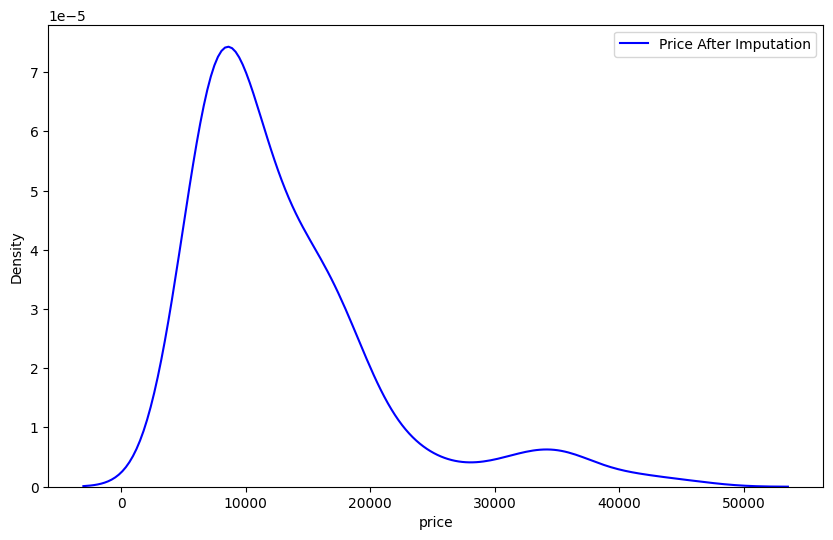

In [ ]:
# Compare distributions before and after imputation for key variables
plt.figure(figsize=(10, 6))
sns.kdeplot(df['price'], label="Price After Imputation", color="blue")
plt.legend()
plt.show()


**This is only after- how do we find the before?**

Better yet - there is a reporting tool distributed as a library that will generate a full report for your analysis and imputation that can be used for this https://docs.profiling.ydata.ai/latest/

Lets generate and browse this report...

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("report_automobile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]